# Importing the libraries

In [508]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importing the dataset

In [509]:
diamonds = pd.read_csv('C:/Users/pfaprado/Documents/IronHack/2021-02-23-project-diamonds/diamonds/diamonds.csv', index_col=False)

# Basic exploration of the data

In [510]:
diamonds.head(10)

#We see that we are dealing with:
#-Continuous/float numeric data (carat, depth, table, price, x, y, z)
#-Integer numerical data (price)
#-Categorical data (cut, color, clarity)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
5,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
6,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
7,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39
8,0.30,Good,J,SI1,64.0,55.0,339,4.25,4.28,2.73
9,0.23,Ideal,J,VS1,62.8,56.0,340,3.93,3.90,2.46


In [511]:
diamonds.shape

#We have abou 48940 entries on our dataset.

(48940, 10)

## Categorical columns: transforming into a scale

### Clarity

In [512]:
clarity_uniques = list(diamonds['clarity'].unique())
clarity_uniques

['SI1', 'VS1', 'VS2', 'SI2', 'VVS2', 'VVS1', 'I1', 'IF']

In [513]:
#Clarity is scaled I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF.
#We will scale the values from 0 to 7, since we have 8 different categories.

In [514]:
from sklearn import preprocessing

In [515]:
le = preprocessing.LabelEncoder()
le.fit(['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF'])

LabelEncoder()

In [516]:
le.classes_

array(['I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2'],
      dtype='<U4')

In [517]:
diamonds['clarity_scaled'] = le.transform(diamonds['clarity'])
diamonds['clarity_scaled']

0        2
1        4
2        5
3        3
4        7
        ..
48935    2
48936    2
48937    2
48938    2
48939    3
Name: clarity_scaled, Length: 48940, dtype: int32

### Color

In [518]:
#Color is scaled D, E, F, G, H, I, J.
#We will scale the values from 0 to 6, since we have 7 categories.

In [519]:
from sklearn import preprocessing

In [520]:
le = preprocessing.LabelEncoder()
le.fit(['J', 'I', 'H', 'G', 'F', 'E', 'D'])

LabelEncoder()

In [521]:
le.classes_

array(['D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype='<U1')

In [522]:
diamonds['color_scaled'] = le.transform(diamonds['color'])
diamonds['color_scaled']

0        1
1        1
2        5
3        6
4        6
        ..
48935    0
48936    0
48937    0
48938    0
48939    0
Name: color_scaled, Length: 48940, dtype: int32

### Cut

In [523]:
#Cut is scaled Fair, Good, Very Good, Premium, Ideal.
#We will scale the values from 0 to 4, since we have 5 categories.

In [524]:
from sklearn import preprocessing

In [525]:
le = preprocessing.LabelEncoder()
le.fit(['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'])

LabelEncoder()

In [526]:
le.classes_

array(['Fair', 'Good', 'Ideal', 'Premium', 'Very Good'], dtype='<U9')

In [527]:
diamonds['cut_scaled'] = le.transform(diamonds['cut'])
diamonds['cut_scaled']

0        3
1        1
2        3
3        1
4        4
        ..
48935    3
48936    2
48937    1
48938    4
48939    2
Name: cut_scaled, Length: 48940, dtype: int32

## Info and describe

In [528]:
diamonds.info()
# We don't have null entries.
# The types were already identified previously.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48940 entries, 0 to 48939
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carat           48940 non-null  float64
 1   cut             48940 non-null  object 
 2   color           48940 non-null  object 
 3   clarity         48940 non-null  object 
 4   depth           48940 non-null  float64
 5   table           48940 non-null  float64
 6   price           48940 non-null  int64  
 7   x               48940 non-null  float64
 8   y               48940 non-null  float64
 9   z               48940 non-null  float64
 10  clarity_scaled  48940 non-null  int32  
 11  color_scaled    48940 non-null  int32  
 12  cut_scaled      48940 non-null  int32  
dtypes: float64(6), int32(3), int64(1), object(3)
memory usage: 4.3+ MB


# Further exploration of the data

In [529]:
diamonds.describe()
# carat: diamonds numerically are concentrated on the left side (lower than 0.7 carat).
# depth: diamonds seem to obey a normal distribution, concentrated on the center, around the median/mean.
# table: the same for depth.
# price: huge variance. There a few diamonds that have high value and hence the mean is dislocated to the right (right-tailed).
# X, Y, Z cannot be compared solely since they are dimensions. However we see that some diamonds are entried as 0! This might be an error.
# clarity_scaled: seem to behave as a normal distribution.
# color_scaled: seem to behave as a normal distribution, slightly right-skewed.

,carat,depth,table,price,x,y,z,clarity_scaled,color_scaled,cut_scaled
count,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000
mean,0.797817,61.751931,57.451161,3934.409644,5.730712,5.734333,3.538648,3.841234,2.592746,2.551451
std,0.474126,1.430026,2.233450,3989.333861,1.121920,1.145344,0.706817,1.724682,1.699858,1.026782
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000,2.000000,1.000000,2.000000
50%,0.700000,61.800000,57.000000,2401.000000,5.690000,5.710000,3.520000,4.000000,3.000000,2.000000
75%,1.040000,62.500000,59.000000,5331.250000,6.540000,6.540000,4.040000,5.000000,4.000000,3.000000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,7.000000,6.000000,4.000000


## z zeroed - calculation

In [530]:
diamonds[(diamonds['x']==0) | (diamonds['y']==0) | (diamonds['z']==0)]
#Most of the rows with missing data, are missing the z value. We can calculate it through the depth, x and y.

,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_scaled,color_scaled,cut_scaled
2010,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0,3,3,3
2104,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0,0,4,3
4323,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0,3,3,3
4941,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0,3,2,3
9187,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0,0,3,1
10119,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0,3,2,2
10825,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0,5,4,4
12290,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0,5,3,2
14433,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0,4,3,0
22126,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0,3,4,3


In [531]:
list(diamonds.columns)

['carat',
 'cut',
 'color',
 'clarity',
 'depth',
 'table',
 'price',
 'x',
 'y',
 'z',
 'clarity_scaled',
 'color_scaled',
 'cut_scaled']

In [532]:
def calculated_z(row):
    
    if row['z']==0 and row['y']!=0 and row['x']!=0:
    
        return row['depth']/100*(row['x']+row['y'])/2
        
    else:
        
        return row['z']

In [533]:
diamonds['calculated_z'] = diamonds.apply(calculated_z, axis=1)

In [534]:
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_scaled,color_scaled,cut_scaled,calculated_z
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,2,1,3,2.31
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,4,1,1,2.31
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,5,5,3,2.63
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,3,6,1,2.75
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,7,6,4,2.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48935,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58,2,0,3,3.58
48936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,2,0,2,3.50
48937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,2,0,1,3.61
48938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,2,0,4,3.56


## Remaining null data transforming to NaN

In [535]:
#We still have some null data:
diamonds[(diamonds['x']==0) | (diamonds['y']==0) | (diamonds['z']==0)]

,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_scaled,color_scaled,cut_scaled,calculated_z
2010,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0,3,3,3,3.850365
2104,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0,0,4,3,3.852030
4323,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0,3,3,3,4.085550
4941,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0,3,2,3,3.839120
9187,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0,0,3,1,4.540800
10119,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0,3,2,2,0.000000
10825,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0,5,4,4,0.000000
12290,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0,5,3,2,4.058160
14433,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0,4,3,0,0.000000
22126,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0,3,4,3,5.031180


In [536]:
#So right now we will reclassify those 0s with NaN.
#Using a lambda fucntion and apply:
diamonds['calculated_z'] = diamonds['calculated_z'].apply(lambda z: 'NaN' if z==0 else z)

In [537]:
diamonds[(diamonds['x']==0) | (diamonds['y']==0) | (diamonds['z']==0)]

,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_scaled,color_scaled,cut_scaled,calculated_z
2010,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0,3,3,3,3.850365
2104,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0,0,4,3,3.852030
4323,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0,3,3,3,4.085550
4941,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0,3,2,3,3.839120
9187,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0,0,3,1,4.540800
10119,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0,3,2,2,NaN
10825,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0,5,4,4,NaN
12290,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0,5,3,2,4.058160
14433,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0,4,3,0,NaN
22126,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0,3,4,3,5.031180


## Validating z

In [538]:
#We shall validate our z values calculated through comparison between a calculated depth and the depth reported.

def calculated_depth(row):
    if row['x']!=0 and row['y']!=0 and row['calculated_z']:
        return row['calculated_z'] * 2 / (row['x'] + row['y'])

In [539]:
diamonds['calculated_depth'] = diamonds.apply(calculated_depth, axis=1)
diamonds['calculated_depth']

0        0.597671
1        0.568966
2        0.623962
3        0.632911
4        0.627848
           ...   
48935    0.626970
48936    0.608167
48937    0.631119
48938    0.627866
48939    0.622222
Name: calculated_depth, Length: 48940, dtype: float64

In [540]:
#Now we will make a comparison column to check whether the values are equal: calculated vs reported:

#diamonds['depth_comparison'] = diamonds.apply(lambda row: (row['calculated_depth']) == (row['depth']/100))

## NaN values in x, y and z

In [541]:
#First, checking out the data present with zeros in these 3 columns:
diamonds[(diamonds['x']==0)|(diamonds['y']==0)|(diamonds['z']==0)]
#We will drop the lines where x, y and z are 0 at the same time.

,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_scaled,color_scaled,cut_scaled,calculated_z,calculated_depth
2010,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0,3,3,3,3.850365,0.591
2104,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0,0,4,3,3.852030,0.581
4323,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0,3,3,3,4.085550,0.630
4941,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0,3,2,3,3.839120,0.592
9187,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0,0,3,1,4.540800,0.640
10119,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0,3,2,2,NaN,NaN
10825,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0,5,4,4,NaN,NaN
12290,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0,5,3,2,4.058160,0.592
14433,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0,4,3,0,NaN,NaN
22126,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0,3,4,3,5.031180,0.594


In [542]:
#Temos por volta de 8 linhas as quais estão cheias de vazios, vamos retirar as mesmas.
diamonds_filtered = diamonds[(diamonds['x']!=0)&(diamonds['y']!=0)&(diamonds['calculated_z']!=0)]

In [543]:
diamonds_filtered

,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_scaled,color_scaled,cut_scaled,calculated_z,calculated_depth
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,2,1,3,2.31,0.597671
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,4,1,1,2.31,0.568966
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,5,5,3,2.63,0.623962
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,3,6,1,2.75,0.632911
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,7,6,4,2.48,0.627848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48935,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58,2,0,3,3.58,0.626970
48936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,2,0,2,3.50,0.608167
48937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,2,0,1,3.61,0.631119
48938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,2,0,4,3.56,0.627866


In [544]:
diamonds.shape

(48940, 15)

In [545]:
diamonds_filtered.shape
#Small difference on quantity of data entries but it will help us further.

(48933, 15)

# Outliers

In [546]:
diamonds_filtered. describe()

,carat,depth,table,price,x,y,z,clarity_scaled,color_scaled,cut_scaled,calculated_depth
count,48933.000000,48933.000000,48933.000000,48933.000000,48933.000000,48933.000000,48933.000000,48933.000000,48933.000000,48933.000000,48933.000000
mean,0.797748,61.751904,57.451041,3933.641592,5.731532,5.735018,3.539154,3.841191,2.592749,2.551509,0.617617
std,0.474093,1.429933,2.232986,3988.524750,1.119905,1.143657,0.705599,1.724749,1.699909,1.026736,0.029297
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,0.000000,0.000000,0.000000,0.000000,0.161023
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000,2.000000,1.000000,2.000000,0.610478
50%,0.700000,61.800000,57.000000,2401.000000,5.690000,5.710000,3.520000,4.000000,3.000000,2.000000,0.618412
75%,1.040000,62.500000,59.000000,5331.000000,6.540000,6.540000,4.040000,5.000000,4.000000,3.000000,0.625247
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,7.000000,6.000000,4.000000,6.192795


In [547]:
#Reminding us that the available data is:
list(diamonds_filtered.columns)

['carat',
 'cut',
 'color',
 'clarity',
 'depth',
 'table',
 'price',
 'x',
 'y',
 'z',
 'clarity_scaled',
 'color_scaled',
 'cut_scaled',
 'calculated_z',
 'calculated_depth']

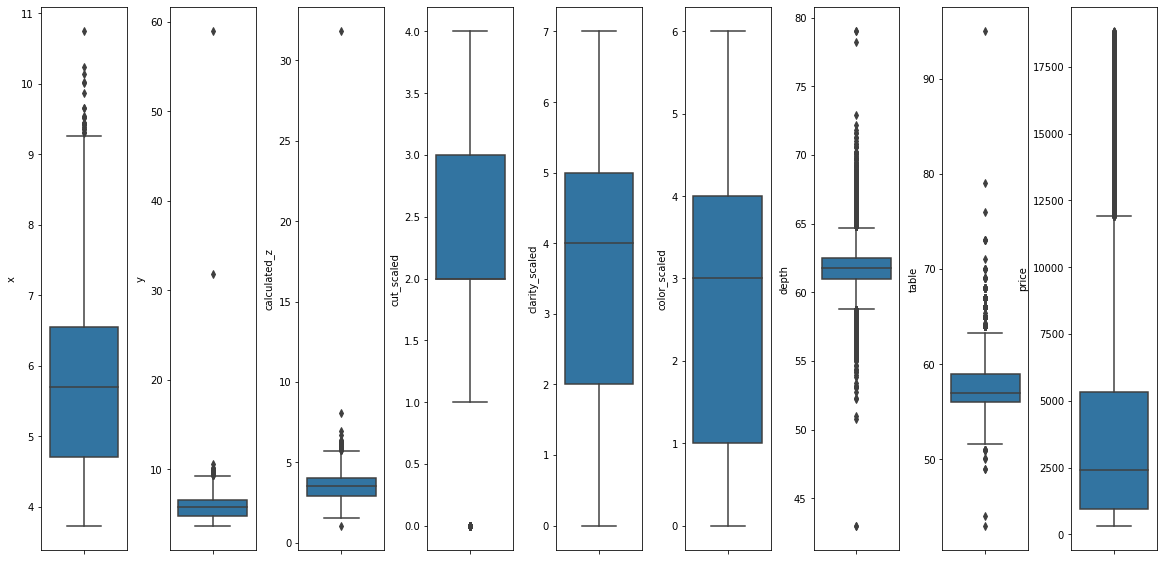

In [552]:
#Ploting the box plots for our variables:
fig, ax = plt.subplots(1,9, figsize=(20, 10))
sns.boxplot(y=diamonds_filtered.x, ax=ax[0])
sns.boxplot(y=diamonds_filtered.y, ax=ax[1])
sns.boxplot(y=diamonds_filtered.calculated_z, ax=ax[2])
sns.boxplot(y=diamonds_filtered.cut_scaled, ax=ax[3])
sns.boxplot(y=diamonds_filtered.clarity_scaled, ax=ax[4])
sns.boxplot(y=diamonds_filtered.color_scaled, ax=ax[5])
sns.boxplot(y=diamonds_filtered.depth, ax=ax[6])
sns.boxplot(y=diamonds_filtered.table, ax=ax[7])
sns.boxplot(y=diamonds_filtered.price, ax=ax[8])

plt.subplots_adjust(wspace=0.5)

## 'y' outliers

In [554]:
#By the boxplot, we see two outliers. Let's investigate it:

diamonds_filtered[diamonds_filtered['y'] > 30]

#It's clear that something is wrong. The calculated_depth is different from depth.

,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_scaled,color_scaled,cut_scaled,calculated_z,calculated_depth
21828,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,58.9,8.06,3,4,3,8.06,0.240633
44603,0.51,Ideal,E,VS1,61.8,55.0,2075,5.15,31.8,5.12,4,1,2,5.12,0.277131


# Exporting the dataset (cleaned)

In [559]:
diamonds_filtered.to_csv('C:/Users/pfaprado/Documents/IronHack/2021-02-23-project-diamonds/diamonds/diamonds_clean.csv', index=False)